In [1]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.stats import linregress, mstats

import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tab = Table.read('/home/jotter/nrao/summer_research_2018/tables/r0.5_catalog_bgfit_mar21_ulim.fits')
onctab = Table.read('/home/jotter/nrao/summer_research_2018/tables/IR_matches_MLLA_mar21_full.fits')
omc1tab = Table.read('/home/jotter/nrao/summer_research_2018/tables/OMC1_r0.5_mar21.fits')
calc = Table.read('/home/jotter/nrao/summer_research_2018/tables/r0.5_mar21_calc_vals.fits')

onc_ind = []
omc1_ind= []
for seq in tab['Seq']:
    if seq in onctab['Seq']:
        onc_ind.append(seq)
    if seq in omc1tab['Seq']:
        omc1_ind.append(seq)
        

In [3]:
theta1c = SkyCoord(ra='05h35m16.46375s', dec='−05d23m22.8486s')
onc_coord = SkyCoord(ra=onctab['RA_B3'], dec=onctab['DEC_B3'], unit=u.degree)
omc1_coord = SkyCoord(ra=omc1tab['RA_B3'], dec=omc1tab['DEC_B3'], unit=u.degree)

In [4]:
onc_radian = onc_coord.separation(theta1c).to(u.radian).value
omc1_radian = omc1_coord.separation(theta1c).to(u.radian).value

onc_dist = onc_radian*(400*u.pc)
omc1_dist = omc1_radian*(400*u.pc)

onc_dustmass = calc[onc_ind]['dust_mass_B3']
onc_dustmass_err = calc[onc_ind]['dust_mass_err_B3']
omc1_dustmass = calc[omc1_ind]['dust_mass_B3']
omc1_dustmass_err = calc[omc1_ind]['dust_mass_err_B3']

onc_rdisk = tab[onc_ind]['fwhm_maj_deconv_B3']
onc_rdisk_err = tab[onc_ind]['fwhm_maj_deconv_err_B3']
onc_rdisk_ind = np.isnan(onc_rdisk)==False
omc1_rdisk = tab[omc1_ind]['fwhm_maj_deconv_B3']
omc1_rdisk_err = tab[omc1_ind]['fwhm_maj_deconv_err_B3']
omc1_rdisk_ind = np.isnan(omc1_rdisk)==False

onc_rdisk = (onc_rdisk*u.arcsecond).to(u.radian) * (400*u.pc).to(u.AU)
omc1_rdisk = (omc1_rdisk*u.arcsecond).to(u.radian) * (400*u.pc).to(u.AU)
onc_rdisk_err = (onc_rdisk_err*u.arcsecond).to(u.radian) * (400*u.pc).to(u.AU)
omc1_rdisk_err = (omc1_rdisk_err*u.arcsecond).to(u.radian) * (400*u.pc).to(u.AU)

onc_rdisk_ulim = tab[onc_ind]['upper_lim_B3']
onc_rdisk_ind_ulim = np.isnan(onc_rdisk_ulim)==False
omc1_rdisk_ulim = tab[omc1_ind]['upper_lim_B3']
omc1_rdisk_ind_ulim = np.isnan(omc1_rdisk_ulim)==False

In [43]:
onc_linreg = linregress(onc_dist, np.log10(onc_dustmass))
omc1_linreg = linregress(omc1_dist, np.log10(omc1_dustmass))

print(onc_linreg.pvalue)
print(omc1_linreg.pvalue)

0.4629891793374985
0.6786287913661742


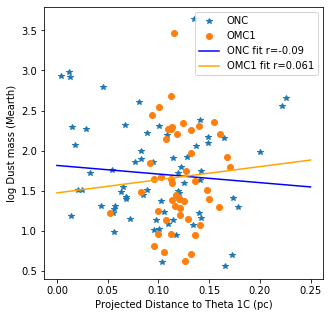

In [44]:
plt.figure(figsize=(5,5))
plt.plot(onc_dist, np.log10(onc_dustmass), label='ONC', linestyle='', marker='*')
plt.plot(omc1_dist, np.log10(omc1_dustmass), label='OMC1', linestyle='', marker='o')

dvals = np.linspace(0,0.25,10)
onc_fit = dvals* onc_linreg.slope + onc_linreg.intercept
omc1_fit = dvals* omc1_linreg.slope + omc1_linreg.intercept

plt.plot(dvals, onc_fit, label=f'ONC fit r={np.round(onc_linreg.rvalue, 3)}', color='blue')
plt.plot(dvals, omc1_fit, label=f'OMC1 fit r={np.round(omc1_linreg.rvalue, 3)}', color='orange')

plt.legend()

plt.xlabel('Projected Distance to Theta 1C (pc)')
plt.ylabel('log Dust mass (Mearth)')
plt.savefig('/home/jotter/nrao/plots/dist_theta1c_dmass.png', bbox_inches='tight')

In [45]:
onc_linreg = linregress(onc_dist[onc_rdisk_ind], onc_rdisk[onc_rdisk_ind])
omc1_linreg = linregress(omc1_dist[omc1_rdisk_ind], omc1_rdisk[omc1_rdisk_ind])

print(onc_linreg.rvalue)
print(omc1_linreg.rvalue)

#onc_linreg = linregress(np.log10(onc_dist[onc_rdisk_ind].value), onc_rdisk[onc_rdisk_ind])
#omc1_linreg = linregress(np.log10(omc1_dist[omc1_rdisk_ind].value), omc1_rdisk[omc1_rdisk_ind])

#print(onc_linreg.rvalue)
#print(omc1_linreg.rvalue)

#onc_linreg = linregress(onc_dist[onc_rdisk_ind], np.log10(onc_rdisk[onc_rdisk_ind]))
#omc1_linreg = linregress(omc1_dist[omc1_rdisk_ind], np.log10(omc1_rdisk[omc1_rdisk_ind]))

#print(onc_linreg.rvalue)
#print(omc1_linreg.rvalue)

-0.1254829987254339
0.0700701159053364


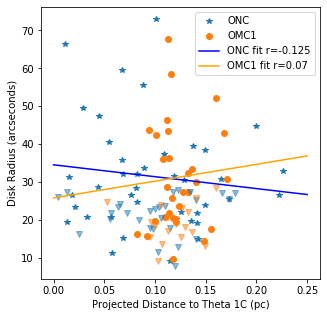

In [46]:
plt.figure(figsize=(5,5))
plt.plot(onc_dist, onc_rdisk, label='ONC', linestyle='', marker='*')
plt.plot(omc1_dist, omc1_rdisk, label='OMC1', linestyle='', marker='o')

plt.plot(onc_dist[onc_rdisk_ind_ulim], onc_rdisk_ulim[onc_rdisk_ind_ulim], linestyle='', marker='v', color='tab:blue', alpha=0.5)
plt.plot(omc1_dist[omc1_rdisk_ind_ulim], omc1_rdisk_ulim[omc1_rdisk_ind_ulim], linestyle='', marker='v', color='tab:orange', alpha=0.5)


dvals = np.linspace(0,0.25,10)
onc_fit = dvals* onc_linreg.slope + onc_linreg.intercept
omc1_fit = dvals* omc1_linreg.slope + omc1_linreg.intercept

plt.plot(dvals, onc_fit, label=f'ONC fit r={np.round(onc_linreg.rvalue, 3)}', color='blue')
plt.plot(dvals, omc1_fit, label=f'OMC1 fit r={np.round(omc1_linreg.rvalue, 3)}', color='orange')

plt.legend()

plt.xlabel('Projected Distance to Theta 1C (pc)')
plt.ylabel('Disk Radius (arcseconds)')
plt.savefig('/home/jotter/nrao/plots/dist_theta1c_rdisk.png', bbox_inches='tight')

In [47]:
print(np.min(onc_dist[onc_rdisk_ind]), np.max(onc_dist[onc_rdisk_ind]))

0.011737131515895893 pc 0.22614748184026706 pc


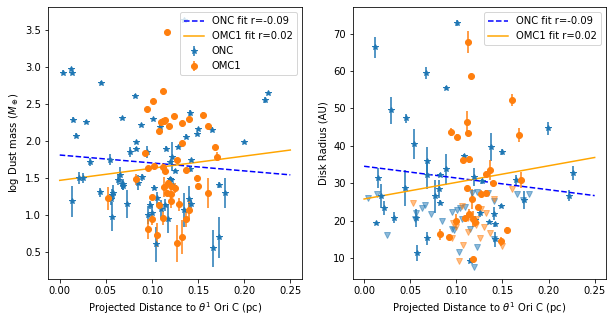

In [5]:
fig, [ax0, ax1] = plt.subplots(1,2, figsize=(10,5))

onc_linreg = linregress(onc_dist, np.log10(onc_dustmass))
omc1_linreg = linregress(omc1_dist, np.log10(omc1_dustmass))

onc_spearman_dmass = mstats.spearmanr(onc_dist, np.log10(onc_dustmass))
omc1_spearman_dmass = mstats.spearmanr(omc1_dist, np.log10(omc1_dustmass))

ax0.errorbar(onc_dist.value, np.log10(onc_dustmass), yerr=onc_dustmass_err/onc_dustmass, label='ONC', linestyle='', marker='*')
ax0.errorbar(omc1_dist.value, np.log10(omc1_dustmass), yerr=omc1_dustmass_err/omc1_dustmass, label='OMC1', linestyle='', marker='o')

dvals = np.linspace(0,0.25,10)
onc_fit = dvals* onc_linreg.slope + onc_linreg.intercept
omc1_fit = dvals* omc1_linreg.slope + omc1_linreg.intercept

ax0.plot(dvals, onc_fit, label=f'ONC fit r={np.round(onc_spearman_dmass[0], 2)}', color='blue', linestyle='--')
ax0.plot(dvals, omc1_fit, label=f'OMC1 fit r={np.round(omc1_spearman_dmass[0], 2)}', color='orange')

ax0.legend()

ax0.set_xlabel(r'Projected Distance to $\theta^1$ Ori C (pc)')
ax0.set_ylabel(r'log Dust mass ($M_\oplus$)')


onc_linreg = linregress(onc_dist[onc_rdisk_ind], onc_rdisk[onc_rdisk_ind])
omc1_linreg = linregress(omc1_dist[omc1_rdisk_ind], omc1_rdisk[omc1_rdisk_ind])

onc_spearman_rdisk = mstats.spearmanr(onc_dist[onc_rdisk_ind], onc_rdisk[onc_rdisk_ind])
omc1_spearman_rdisk = mstats.spearmanr(omc1_dist[omc1_rdisk_ind], omc1_rdisk[omc1_rdisk_ind])

ax1.errorbar(onc_dist.value, onc_rdisk.value, yerr=onc_rdisk_err.value, linestyle='', marker='*')
ax1.errorbar(omc1_dist.value, omc1_rdisk.value, yerr=omc1_rdisk_err.value, linestyle='', marker='o')

ax1.plot(onc_dist[onc_rdisk_ind_ulim], onc_rdisk_ulim[onc_rdisk_ind_ulim], linestyle='', marker='v', color='tab:blue', alpha=0.5)
ax1.plot(omc1_dist[omc1_rdisk_ind_ulim], omc1_rdisk_ulim[omc1_rdisk_ind_ulim], linestyle='', marker='v', color='tab:orange', alpha=0.5)

rvals = np.linspace(0,0.25,10)
onc_fit = rvals* onc_linreg.slope + onc_linreg.intercept
omc1_fit = rvals* omc1_linreg.slope + omc1_linreg.intercept

ax1.plot(dvals, onc_fit, label=f'ONC fit r={np.round(onc_spearman_rdisk[0], 2)}', color='blue', linestyle='--')
ax1.plot(dvals, omc1_fit, label=f'OMC1 fit r={np.round(omc1_spearman_rdisk[0], 2)}', color='orange')

ax1.legend()

ax1.set_xlabel(r'Projected Distance to $\theta^1$ Ori C (pc)')
ax1.set_ylabel('Disk Radius (AU)')

plt.savefig('/home/jotter/nrao/plots/dist_theta1c_corrs.png', bbox_inches='tight')

In [10]:
print(onc_spearman_dmass, onc_spearman_rdisk)
print(omc1_spearman_dmass, omc1_spearman_rdisk)

SpearmanrResult(correlation=-0.09236390208257216, pvalue=0.4503501505647296) SpearmanrResult(correlation=-0.08989547038327526, pvalue=0.576199535631555)
SpearmanrResult(correlation=0.019539730785931395, pvalue=0.8951272406622455) SpearmanrResult(correlation=0.01625615763546798, pvalue=0.9332975952047903)
